# Highway ramp exploration
* How much data is there?
* Is it available at 5 min intervals?
    * Yup
* What percentage of the ramps have working sensors?
    * as;kdfak;s
* Notes
    * Ramp sensors only keep track of Totalflow

In [93]:
%matplotlib inline
data_5min_path = "../station_5min/2015/d11/"
import pandas as pd
import numpy as np
import gzip
import time

In [46]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(data_5min_path) if isfile(join(data_5min_path, f))]

In [47]:
onlyfiles[0]

'd11_text_station_5min_2016_01_01.txt.gz'

In [252]:
colnames = ['Timestamp','Station','District','Freeway','Direction_of_Travel','LaneType','StationLength','Samples',
            'Perc_Observed','TotalFlow','AvgOccupancy','AvgSpeed',
            'Lane1_Samples','Lane1_Flow','Lane1_AvgOcc','Lane1_AvgSpeed','Lane1_Observed',
            'Lane2_Samples','Lane2_Flow','Lane2_AvgOcc','Lane2_AvgSpeed','Lane2_Observed',
            'Lane3_Samples','Lane3_Flow','Lane3_AvgOcc','Lane3_AvgSpeed','Lane3_Observed',
            'Lane4_Samples','Lane4_Flow','Lane4_AvgOcc','Lane4_AvgSpeed','Lane4_Observed',
            'Lane5_Samples','Lane5_Flow','Lane5_AvgOcc','Lane5_AvgSpeed','Lane5_Observed',
            'Lane6_Samples','Lane6_Flow','Lane6_AvgOcc','Lane6_AvgSpeed','Lane6_Observed',
            'Lane7_Samples','Lane7_Flow','Lane7_AvgOcc','Lane7_AvgSpeed','Lane7_Observed',
            'Lane8_Samples','Lane8_Flow','Lane8_AvgOcc','Lane8_AvgSpeed','Lane8_Observed',]

In [253]:
with gzip.open(data_5min_path+onlyfiles[0], 'rb') as f:
    file_content = pd.read_csv(f, header=None,names=colnames)

In [254]:
file_content.head(5)

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_Samples,Lane7_Flow,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed
0,01/01/2016 00:00:00,1100313,11,5,N,FR,NaN,10,100,8.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,01/01/2016 00:00:00,1100323,11,5,N,FR,NaN,20,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,01/01/2016 00:00:00,1100326,11,5,N,FR,NaN,20,100,12.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,01/01/2016 00:00:00,1100330,11,5,N,FR,NaN,20,100,12.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,01/01/2016 00:00:00,1100333,11,5,N,FR,NaN,10,100,4.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [255]:
file_content.shape

(410112, 52)

In [256]:
meta_path = "../station_5min/2015/meta_data/d11/"

In [257]:
file_content.ix[file_content.Station == 1100313,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed','LaneType']].head()

,Timestamp,TotalFlow,AvgOccupancy,AvgSpeed,LaneType
0,01/01/2016 00:00:00,8.0,NaN,NaN,FR
1424,01/01/2016 00:05:00,8.0,NaN,NaN,FR
2848,01/01/2016 00:10:00,12.0,NaN,NaN,FR
4272,01/01/2016 00:15:00,21.0,NaN,NaN,FR
5696,01/01/2016 00:20:00,19.0,NaN,NaN,FR


### Find healthy sensors

In [258]:
def mark_bad_sensors(file_content, threshold = 0):
    file_content['bad_count'] = file_content.loc[:,['TotalFlow', 'AvgOccupancy', 'AvgSpeed']].isnull().sum(axis=1)
    total_bad = file_content.groupby('Station')['bad_count'].sum().reset_index()
    bad_stations = total_bad[total_bad['bad_count'] > threshold]['Station'].tolist()
    file_content['bad_station'] = file_content['Station'].isin(bad_stations) 
    return file_content

bad = mark_bad_sensors(file_content)

bad['bad_station'].describe()

count     410112
unique         2
top        False
freq      239904
Name: bad_station, dtype: object

In [262]:
df_list = []
for i, filename in enumerate(onlyfiles):
    t1 = time.time()
    with gzip.open(data_5min_path+filename, 'rb') as f:
        file_content = pd.read_csv(f,header=None,names=colnames)
        df_list.append(file_content)
    t2 = time.time()
    print i, filename, t2-t1
    
big_df = pd.concat(df_list)

0 d11_text_station_5min_2016_01_01.txt.gz 2.04062581062
1 d11_text_station_5min_2016_01_02.txt.gz 1.92496395111
2 d11_text_station_5min_2016_01_03.txt.gz 1.92981100082
3 d11_text_station_5min_2016_01_04.txt.gz 1.91356897354
4 d11_text_station_5min_2016_01_05.txt.gz 1.90593791008
5 d11_text_station_5min_2016_01_06.txt.gz 1.89924383163
6 d11_text_station_5min_2016_01_07.txt.gz 1.93693709373
7 d11_text_station_5min_2016_01_08.txt.gz 1.87350702286
8 d11_text_station_5min_2016_01_09.txt.gz 1.8893198967
9 d11_text_station_5min_2016_01_10.txt.gz 1.93443584442
10 d11_text_station_5min_2016_01_11.txt.gz 1.94883394241
11 d11_text_station_5min_2016_01_12.txt.gz 1.93462586403
12 d11_text_station_5min_2016_01_15.txt.gz 1.91824603081
13 d11_text_station_5min_2016_01_16.txt.gz 1.93526387215
14 d11_text_station_5min_2016_01_17.txt.gz 1.89437103271
15 d11_text_station_5min_2016_01_18.txt.gz 1.91398096085
16 d11_text_station_5min_2016_01_19.txt.gz 1.90783691406
17 d11_text_station_5min_2016_01_20.txt.gz

In [263]:
big_df.shape

(9842688, 52)

In [361]:
big_df = mark_bad_sensors(big_df)
good_big_df = big_df[big_df['bad_station']==False]
good_big_df.shape

(5757696, 54)

In [377]:
#find bad OR/FR sensors
big_df.loc[big_df.loc[:,'LaneType']=='OR',['TotalFlow']].isnull()

,TotalFlow
88,False
90,False
92,False
94,False
96,False
98,False
101,False
102,False
104,False
106,False


In [265]:
good_big_df.head()

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed,bad_count,bad_station
86,01/01/2016 00:00:00,1108148,11,15,S,ML,0.513,60,100,72.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,False
87,01/01/2016 00:00:00,1108285,11,94,W,ML,0.313,40,100,59.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,False
89,01/01/2016 00:00:00,1108287,11,94,W,ML,0.319,40,100,50.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,False
91,01/01/2016 00:00:00,1108289,11,94,W,ML,0.319,40,100,62.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,False
93,01/01/2016 00:00:00,1108291,11,94,W,ML,0.206,50,100,69.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,False


In [266]:
big_df[big_df['LaneType']=='OR'].head(3)

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed,bad_count,bad_station
88,01/01/2016 00:00:00,1108286,11,94,W,OR,NaN,10,100,1.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
90,01/01/2016 00:00:00,1108288,11,94,W,OR,NaN,10,100,1.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
92,01/01/2016 00:00:00,1108290,11,94,W,OR,NaN,20,100,19.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True


In [267]:
big_df[big_df['LaneType']=='FR'].head(3)

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed,bad_count,bad_station
0,01/01/2016 00:00:00,1100313,11,5,N,FR,NaN,10,100,8.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
1,01/01/2016 00:00:00,1100323,11,5,N,FR,NaN,20,0,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,3,True
2,01/01/2016 00:00:00,1100326,11,5,N,FR,NaN,20,100,12.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True


In [268]:
big_df[big_df['LaneType']=='CH'].head(3)

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed,bad_count,bad_station
535,01/01/2016 00:00:00,1111515,11,8,W,CH,NaN,20,100,25.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
652,01/01/2016 00:00:00,1113641,11,78,E,CH,NaN,10,50,15.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
1009,01/01/2016 00:00:00,1119449,11,78,W,CH,NaN,30,100,35.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True


In [269]:
big_df['LaneType'].describe()
big_df.groupby(['LaneType'])['Station'].unique().apply(lambda x:len(x))

LaneType
CD      1
CH      7
FF     47
FR    229
HV     87
ML    746
OR    307
Name: Station, dtype: int64

In [231]:
#big_df_droppedna = big_df.dropna(subset=['TotalFlow', 'AvgOccupancy', 'AvgSpeed'])

##goodsensors = mark_good_sensors(big_df)
#print goodsensors.shape, big_df.shape

#sensor_results = big_df[goodsensors]
#sensor_results.head()

#big_df_droppedna.head()

In [272]:
sensor_results = big_df[big_df['LaneType']=='OR'].reset_index(drop=True)

In [291]:
sensor_results.head(3)

,Timestamp,Station,District,Freeway,Direction_of_Travel,LaneType,StationLength,Samples,Perc_Observed,TotalFlow,...,Lane7_AvgOcc,Lane7_AvgSpeed,Lane7_Observed,Lane8_Samples,Lane8_Flow,Lane8_AvgOcc,Lane8_AvgSpeed,Lane8_Observed,bad_count,bad_station
0,01/01/2016 00:00:00,1108286,11,94,W,OR,NaN,10,100,1.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
1,01/01/2016 00:00:00,1108288,11,94,W,OR,NaN,10,100,1.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True
2,01/01/2016 00:00:00,1108290,11,94,W,OR,NaN,20,100,19.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,2,True


In [282]:
sensor_results.loc[:,['TotalFlow','AvgOccupancy','AvgSpeed']].describe()

,TotalFlow,AvgOccupancy,AvgSpeed
count,1.928051e+06,0.0,0.0
mean,2.573618e+01,NaN,NaN
std,2.599755e+01,NaN,NaN
min,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,3.020000e+02,NaN,NaN


In [342]:
my_list = sensor_results.ix[:5,'Station'].tolist()
for station in my_list:  
    print station

1108286
1108288
1108290
1108292
1108294
1108296


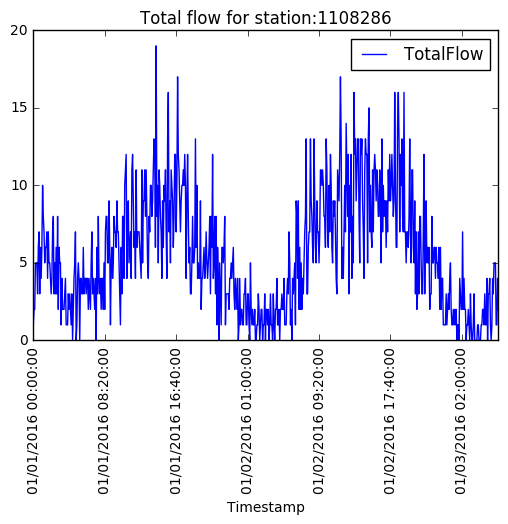

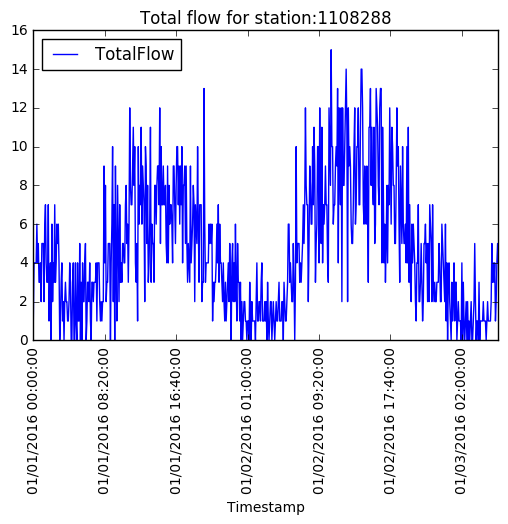

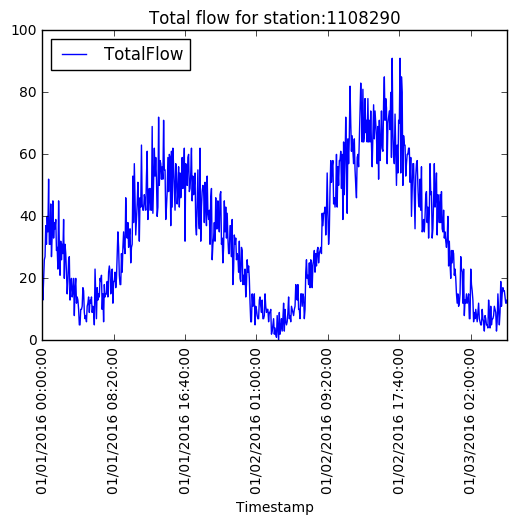

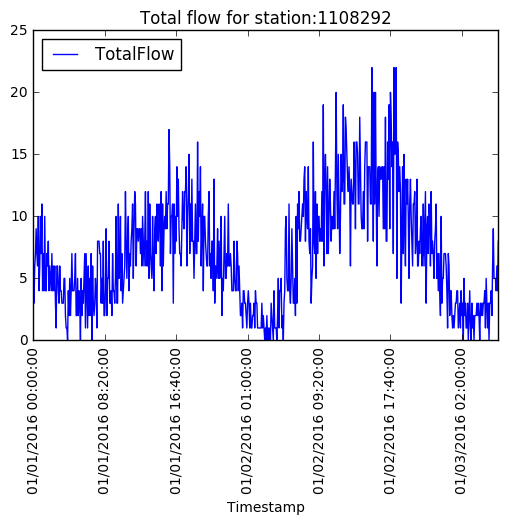

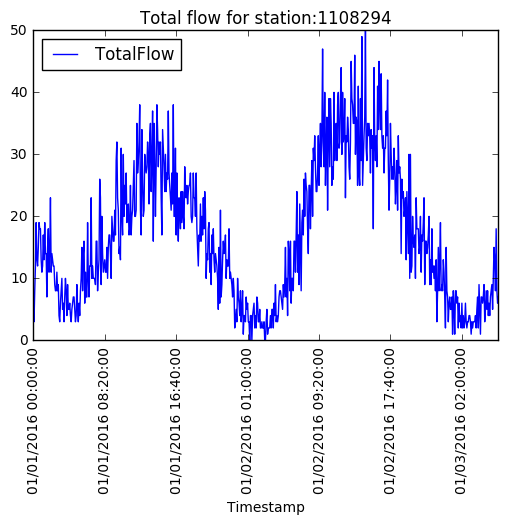

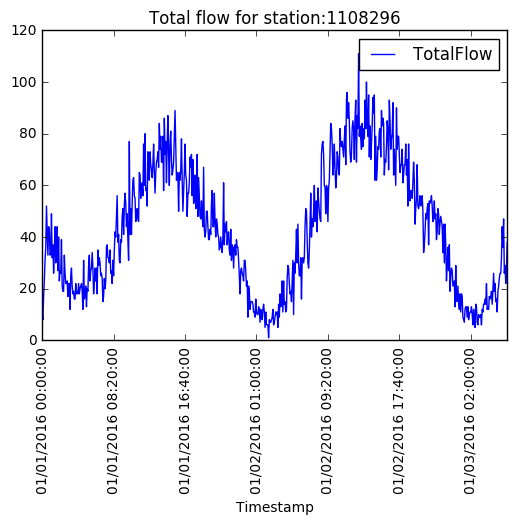

In [360]:
my_list = sensor_results.ix[:5,'Station'].tolist()
stations_grouped = sensor_results.groupby('Station')
for station in my_list:  
    small_df = stations_grouped.get_group(station).loc[:,['Timestamp','TotalFlow']]
    small_df.loc[:200000,:].plot(x='Timestamp', y='TotalFlow', title="Total flow for station:%i"%(station),rot=90)